import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys


specify training data

In [3]:
train_x = np.array([-1.67245526, -2.36540279, -2.14724263, 1.40539096, 1.24297767,
              -1.71043904, 2.31579097, 2.40479939, -2.22112823])

train_y = np.array([-18.56122168, -24.99658931, -24.41907817, -2.688209,
              -1.54725306, -19.18190097, 1.74117419,
              3.97703338, -24.80977847])

do a simple plot of data (red points) and some (rather badly fitting) quadratic line ($-.5x^2 + .4x -.3$) in blue

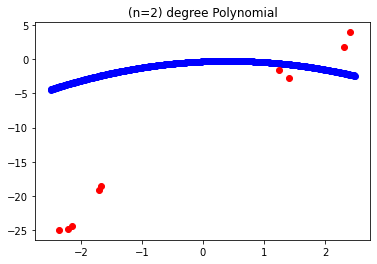

In [4]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y=-0.5*(x**2) + 0.4*x -0.3;
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n=2) degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()


Here is my derivation of the general gradient.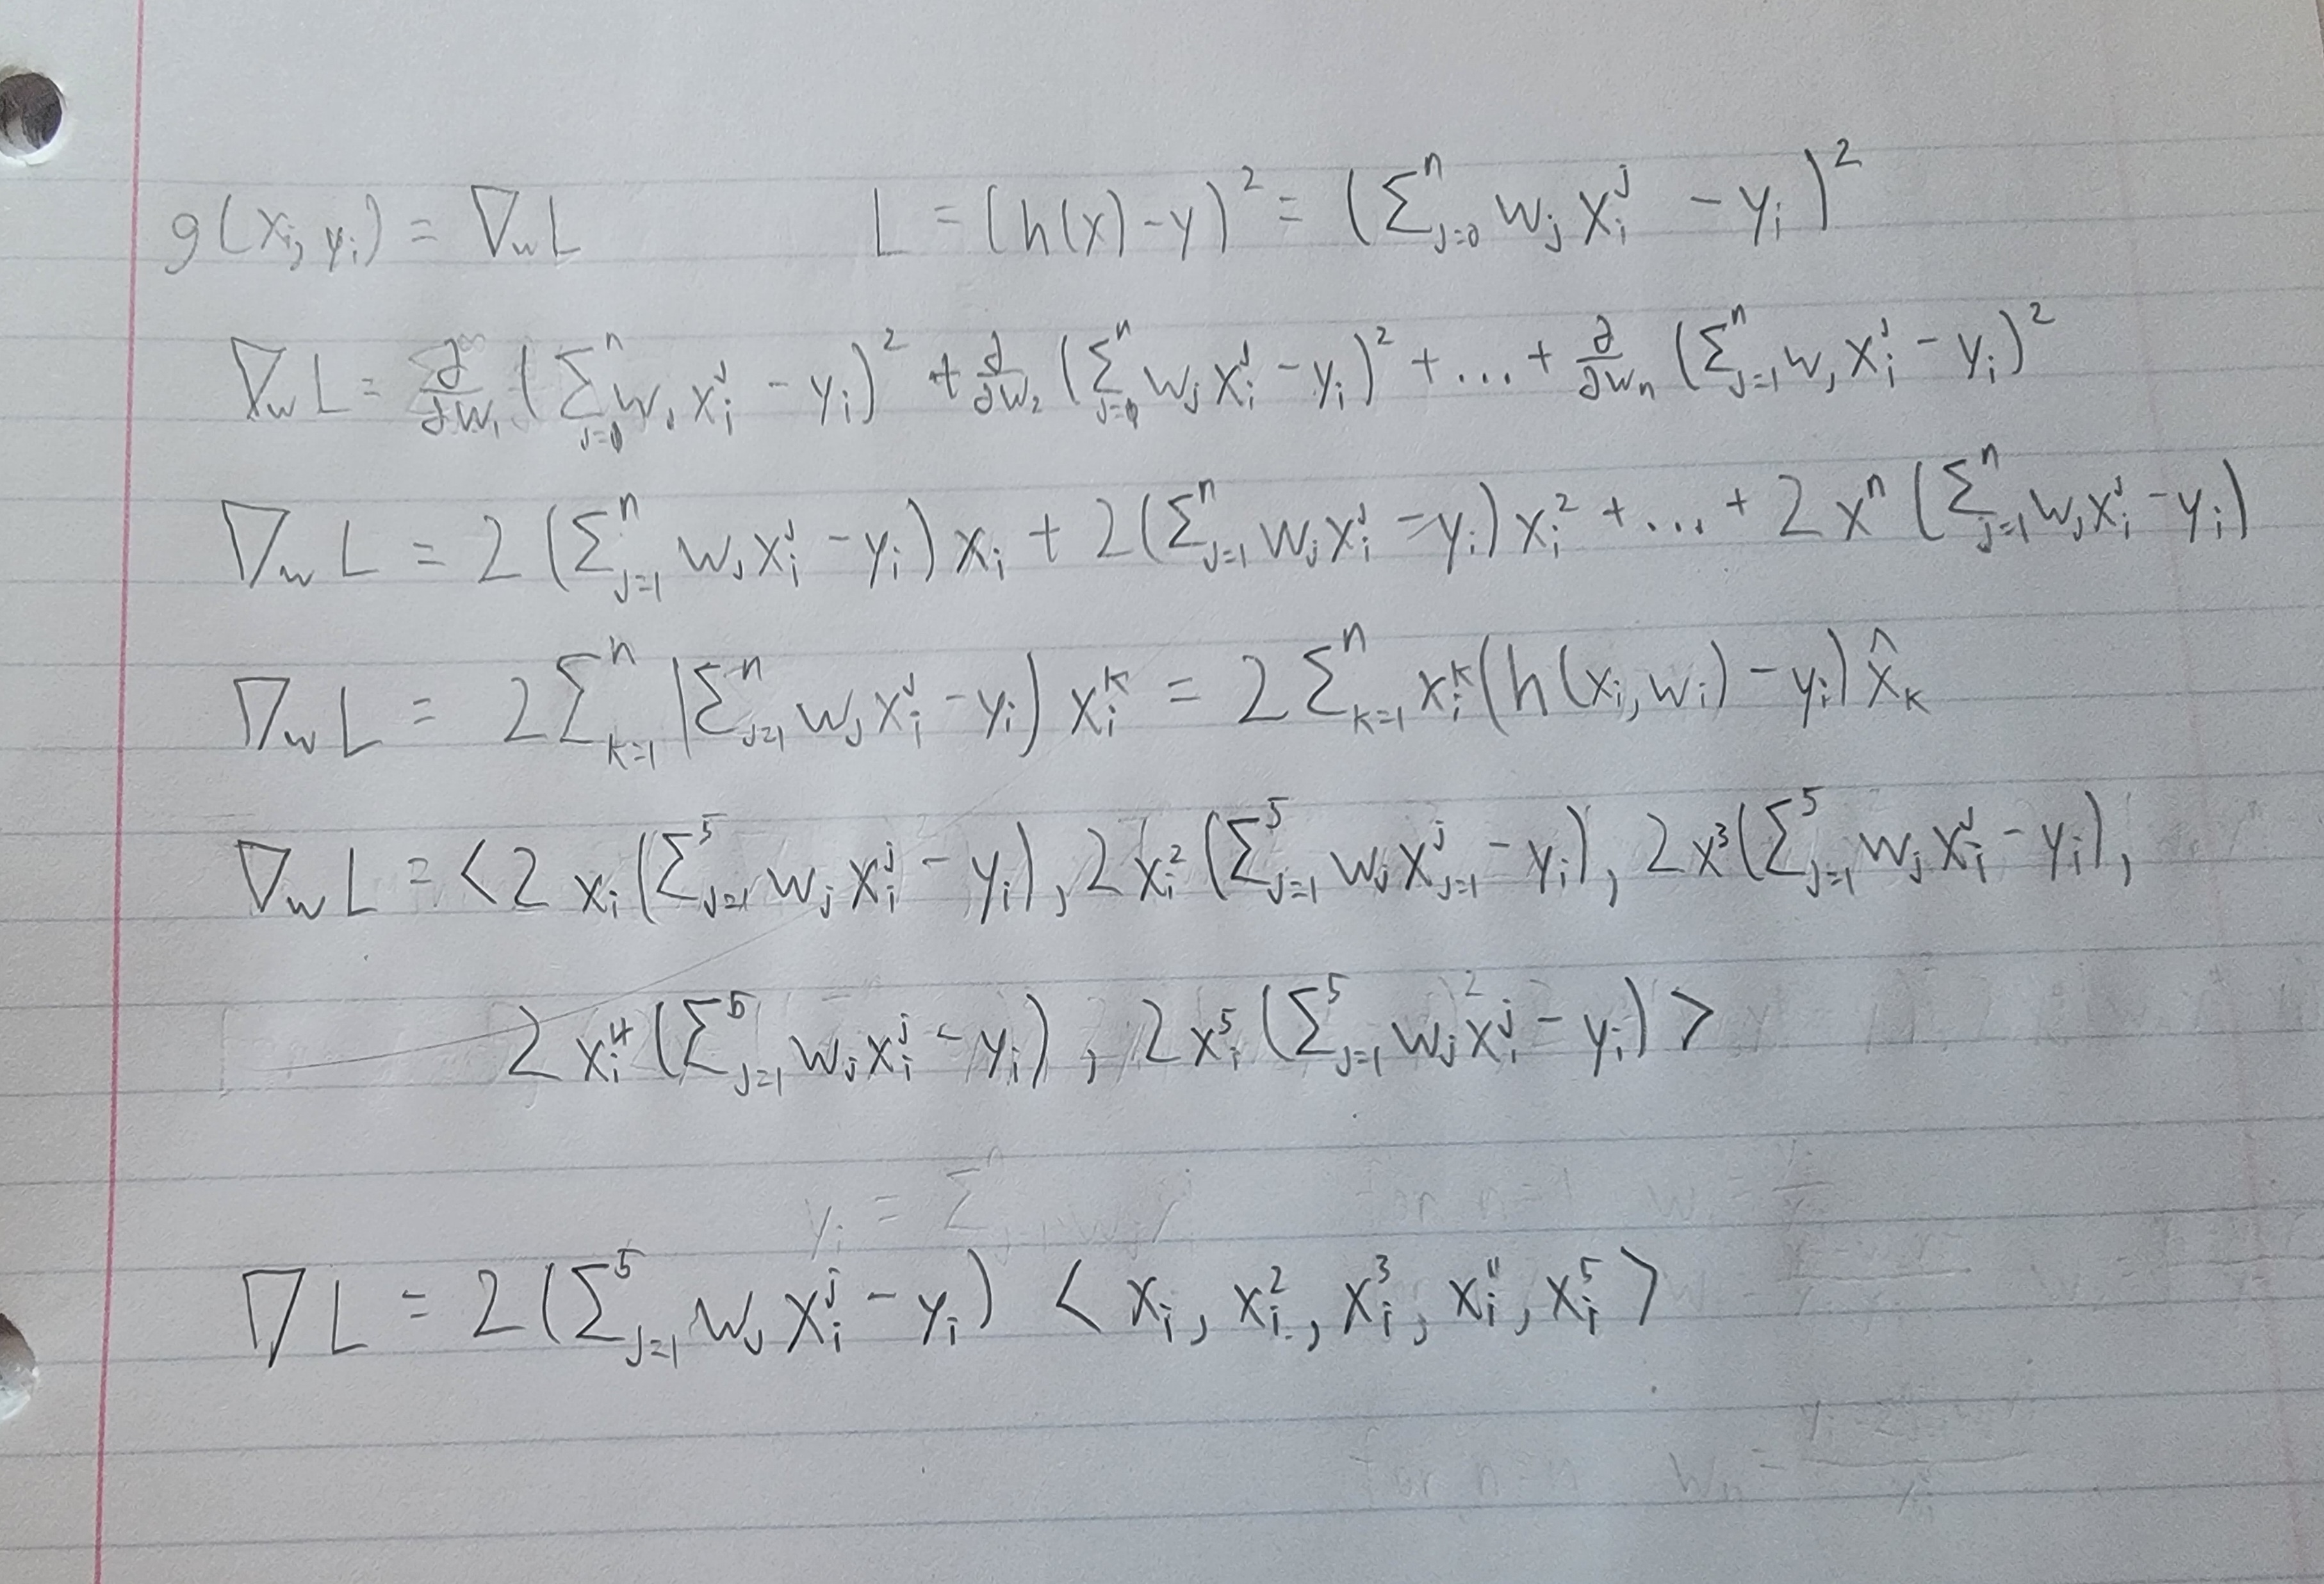

First lets figure out how to compute our optimal model. Through experimentation on my end, I found this step size was something of a magic step size which offered very fast convergence (MUCH faster than the 500,000 steps) with a high degree of precision.

In [5]:
# We're gonna have to do this multipule times, so lets start with a loop.
solution_weights = []
for polynomial_order in range(1,6):
    #Initialize Random Weights
    weights = np.random.uniform(low = -0.0001, high = 0.0001, size = (polynomial_order,))
    num_points = len(train_x)

    # Calculate Polynomial Output of Training Data
    polynomial_model = np.array(sum([weights[j] * train_x**(j) for j in range(polynomial_order)]))

    # Calculate error h(x_i,y_i) between polynomial estimate and y_i
    model_error = polynomial_model - train_y
    avg_error = np.average(model_error)

    # Compute the Gradient of the training data, which is a function of training data and the error.

    gradient_training_data = 2 * model_error * np.array([train_x**(k) for k in range(polynomial_order)])

    # Average across training data

    avg_gradient = np.average(gradient_training_data,axis=1)

    # Specify error tolerance and Gradient Descent Step Size

    step_size = 0.0005
    iterations = 0
    iteration_limit = 1000000 # This is a safeguard to ensure the loop doesn't get stuck on the low order approximations.
    error_tolerance = 0.00000001

    while np.average(model_error) > error_tolerance and iterations < iteration_limit:
        # Compute New Weights
        weights = weights - step_size * avg_gradient
        # Re compute model error and average the gradient
        polynomial_model = np.array(sum([weights[j] * train_x**(j) for j in range(polynomial_order)]))
        model_error = polynomial_model - train_y
        gradient_training_data = 2 * model_error * np.array([train_x**(k) for k in range(polynomial_order)])
        avg_gradient = np.average(gradient_training_data,axis=1)
        iterations = iterations + 1
    
    solution_weights.append(weights)
    print('Loop ' + str(polynomial_order) + ' completed in ' + str(iterations) + ' iterations!')
print('All models complete!')

Loop 1 completed in 20918 iterations!
Loop 2 completed in 21326 iterations!
Loop 3 completed in 145265 iterations!
Loop 4 completed in 174476 iterations!
Loop 5 completed in 4099 iterations!
All models complete!


Lets start plotting our models. First lets look at out n=1 plot:

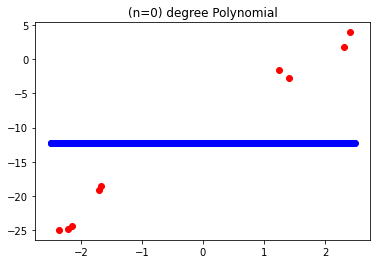

In [6]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y = solution_weights[0]
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n=0) degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()

This n=0 plot is pretty awful, but I suppose thats to be expected. Luckily it IS in the middle of the dataset so things look promising.

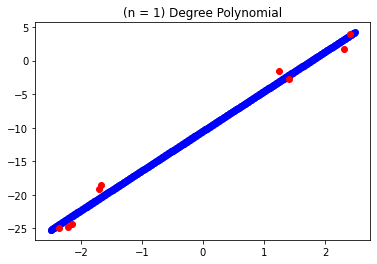

In [7]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y = solution_weights[1][0] + solution_weights[1][1] * x
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n = 1) Degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()


This n=1 plot is looking pretty good. In all honesty the data looks generally linear so I'd probably stop here if I were examining a physical phenomena. I'd need more data to demonstrate a linear model was inadequate to justify bringing in something more advanced.

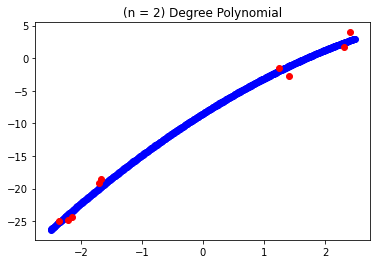

In [8]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y = solution_weights[2][0] + solution_weights[2][1] * x + solution_weights[2][2] * x ** 2 
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n = 2) Degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()


This n=2 plot is looking pretty good. Though it fits the bottom part of the dataset more than the top, which implies the curve would not extrapolate well.

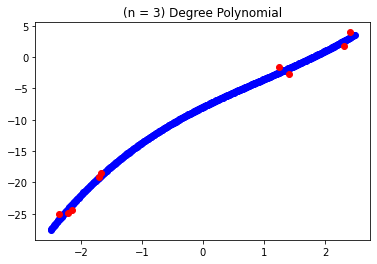

In [9]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y = solution_weights[3][0] + solution_weights[3][1] * x + solution_weights[3][2] * x ** 2 \
    + solution_weights[3][3] * x ** 3
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n = 3) Degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()


This n=3 plot is doing okay. The end behavior appears to fit the data better than the previous model, though the middle of the graph doesn't look trustworthy.

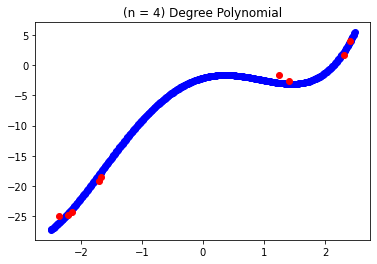

In [9]:
xs = [];
ys = [];
for x in np.arange(-2.5, 2.5, 0.01):
    xs.append(x);
    y = solution_weights[4][0] + solution_weights[4][1] * x + solution_weights[4][2] * x ** 2 \
    + solution_weights[4][3] * x ** 3 + solution_weights[4][4] * x ** 4
    ys.append(y);

test_x = np.array(xs);
test_y = np.array(ys);

title = '(n = 4) Degree Polynomial'
plt.title(title, loc='center')
plt.scatter(test_x,test_y, color='blue')
plt.scatter(train_x,train_y, color='red')


plt.show()


This n=4 plot offers an almost perfect fit. Though again it may or may not be trustworthy to extrapolate this further.